In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [19]:
def get_normalize_data(data, scaled = 'min_max'):
    # NORMALIZANDO OS DADOS 
    normalize_data = pd.DataFrame()
    if scaled == 'max':
        for column in data.columns: 
            normalize_data[column] = data[column]  / data[column].abs().max() 
    else:    
        for column in data.columns: 
            normalize_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())     
    return normalize_data


def split_train_data(data, predictive_label, apply_smote = True):

    X = data.drop("conformity_class", axis=1)
    y = data[predictive_label]
    
    if apply_smote:
        # SMOTE
        smote = SMOTE(random_state=32)
        X, y = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=999
    )
    
    return X_train, X_test, y_train, y_test


def get_lazy_classifier_result(X_train, X_test, y_train, y_test):
    # Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True)
    clf_models, clf_predictions = clf.fit(X_train, X_test, y_train, y_test)

    # Regressor
    reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
    reg_models, reg_predictions = reg.fit(X_train, X_test, y_train, y_test)

    return clf_models, clf_predictions, reg_models, reg_predictions

# Load synthetic data

In [20]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("data\synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

predictive_label = "conformity_class"

attributes = list(load_data.drop("conformity_class", axis=1).columns)
# pd.plotting.scatter_matrix(load_data[attributes], figsize=(10, 8))

<AxesSubplot:>

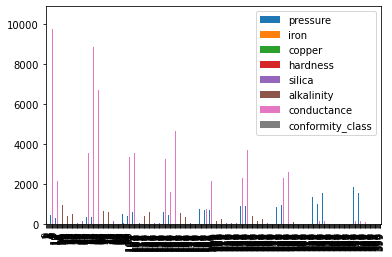

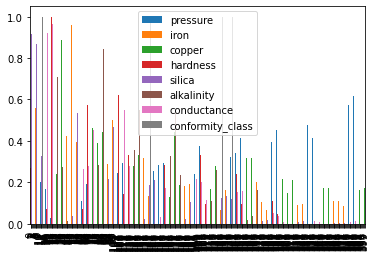

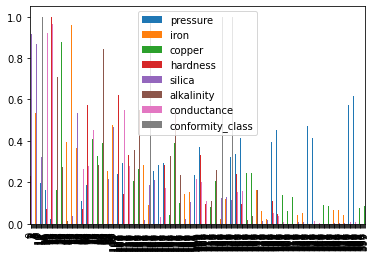

In [22]:
# Synthetic data
load_data.plot(kind = 'bar')

# Synthetic normalized data
get_normalize_data(load_data, scaled = 'max').plot(kind = 'bar')
get_normalize_data(load_data, scaled = 'min_max').plot(kind = 'bar')

In [69]:
# TESTE 1: Synthetic data

X_train, X_test, y_train, y_test = split_train_data(
    load_data, predictive_label, apply_smote=False
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
display(clf_models)

# Linear regression machine learning models
display(reg_models)

 26%|█████████████████████▍                                                            | 11/42 [00:00<00:01, 28.33it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 16.90it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.90,0.75,0.75,0.89,0.08
Perceptron,0.72,0.74,0.74,0.76,0.01
DecisionTreeClassifier,0.85,0.72,0.72,0.85,0.01
GaussianNB,0.70,0.67,0.67,0.73,0.01
BaggingClassifier,0.86,0.63,0.63,0.83,0.03
LabelSpreading,0.78,0.62,0.62,0.78,0.01
PassiveAggressiveClassifier,0.84,0.62,0.62,0.82,0.01
NearestCentroid,0.57,0.61,0.61,0.63,0.01
AdaBoostClassifier,0.85,0.61,0.61,0.82,0.10


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.35,0.39,0.30,0.12
HistGradientBoostingRegressor,0.29,0.33,0.31,0.42
LGBMRegressor,0.26,0.31,0.32,0.07
GradientBoostingRegressor,0.24,0.28,0.32,0.08
RandomForestRegressor,0.22,0.27,0.32,0.20
MLPRegressor,0.17,0.22,0.34,0.31
BaggingRegressor,0.16,0.21,0.34,0.04
XGBRegressor,0.16,0.21,0.34,0.10
AdaBoostRegressor,0.12,0.17,0.35,0.06


In [43]:
# TESTE 2: Synthetic data with SMOTE function

X_train, X_test, y_train, y_test = split_train_data(
    load_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
display(clf_models)

# Linear regression machine learning models
display(reg_models)

 29%|███████████████████████▍                                                          | 12/42 [00:00<00:01, 17.66it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 10.69it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.15
LGBMClassifier,0.89,0.89,0.89,0.89,0.10
XGBClassifier,0.88,0.88,0.88,0.88,0.09
RandomForestClassifier,0.88,0.88,0.88,0.88,0.25
BaggingClassifier,0.87,0.87,0.87,0.87,0.04
LabelSpreading,0.86,0.87,0.87,0.86,0.04
LabelPropagation,0.86,0.86,0.86,0.86,0.03
AdaBoostClassifier,0.85,0.85,0.85,0.85,0.11
NuSVC,0.85,0.85,0.85,0.85,0.03


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.80,0.80,0.22,0.16
HistGradientBoostingRegressor,0.69,0.70,0.27,0.65
RandomForestRegressor,0.67,0.68,0.28,0.25
LGBMRegressor,0.66,0.67,0.29,0.10
XGBRegressor,0.66,0.67,0.29,0.12
BaggingRegressor,0.60,0.61,0.31,0.03
GradientBoostingRegressor,0.60,0.61,0.31,0.11
NuSVR,0.55,0.57,0.33,0.04
SVR,0.54,0.56,0.33,0.03


In [71]:
# TESTE 3: Synthetic normalized data (max_scaled) without SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=False
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
display(clf_models)

# Linear regression machine learning models
display(reg_models)

 26%|█████████████████████▍                                                            | 11/42 [00:00<00:01, 28.90it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 17.83it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.90,0.75,0.75,0.89,0.08
Perceptron,0.72,0.74,0.74,0.76,0.01
DecisionTreeClassifier,0.85,0.72,0.72,0.85,0.01
GaussianNB,0.70,0.67,0.67,0.73,0.01
BaggingClassifier,0.86,0.63,0.63,0.83,0.03
LabelSpreading,0.78,0.62,0.62,0.78,0.02
PassiveAggressiveClassifier,0.84,0.62,0.62,0.82,0.01
NearestCentroid,0.57,0.61,0.61,0.63,0.01
AdaBoostClassifier,0.85,0.61,0.61,0.82,0.10


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.35,0.39,0.30,0.12
HistGradientBoostingRegressor,0.29,0.33,0.31,0.42
LGBMRegressor,0.26,0.31,0.32,0.06
GradientBoostingRegressor,0.24,0.28,0.32,0.08
RandomForestRegressor,0.22,0.27,0.32,0.18
MLPRegressor,0.17,0.22,0.34,0.31
BaggingRegressor,0.16,0.21,0.34,0.05
XGBRegressor,0.16,0.21,0.34,0.10
AdaBoostRegressor,0.12,0.17,0.35,0.05


In [34]:
# TESTE 4: Synthetic normalized data (max_scaled) with SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
display(clf_models)

# Linear regression machine learning models
display(reg_models)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 21.18it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00,  9.90it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 ExtraTreesClassifier               0.96               0.96     0.96      0.96   
 LGBMClassifier                     0.89               0.89     0.89      0.89   
 XGBClassifier                      0.88               0.88     0.88      0.88   
 RandomForestClassifier             0.88               0.88     0.88      0.88   
 BaggingClassifier                  0.87               0.87     0.87      0.87   
 LabelSpreading                     0.86               0.87     0.87      0.86   
 LabelPropagation                   0.86               0.86     0.86      0.86   
 AdaBoostClassifier                 0.85               0.85     0.85      0.85   
 NuSVC                              0.85               0.85     0.85      0.85   
 SVC                                0.84               0.84     0.84      0.84   
 DecisionTreeCla

In [36]:
# TESTE 5: Synthetic normalized (min_max_scaled) data without SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
display(clf_models)

# Linear regression machine learning models
display(reg_models)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 21.33it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.08it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 ExtraTreesClassifier               0.96               0.96     0.96      0.96   
 LGBMClassifier                     0.89               0.89     0.89      0.89   
 XGBClassifier                      0.88               0.88     0.88      0.88   
 RandomForestClassifier             0.88               0.88     0.88      0.88   
 BaggingClassifier                  0.87               0.87     0.87      0.87   
 LabelSpreading                     0.86               0.87     0.87      0.86   
 LabelPropagation                   0.86               0.86     0.86      0.86   
 AdaBoostClassifier                 0.85               0.85     0.85      0.85   
 NuSVC                              0.85               0.85     0.85      0.85   
 SVC                                0.84               0.84     0.84      0.84   
 DecisionTreeCla

In [37]:
# TESTE 6: Synthetic normalized (min_max_scaled) data with SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'min_max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
display(clf_models)

# Linear regression machine learning models
display(reg_models)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 20.12it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.19it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 ExtraTreesClassifier               0.96               0.96     0.96      0.96   
 LGBMClassifier                     0.89               0.89     0.89      0.89   
 XGBClassifier                      0.88               0.88     0.88      0.88   
 RandomForestClassifier             0.88               0.88     0.88      0.88   
 BaggingClassifier                  0.87               0.87     0.87      0.87   
 LabelSpreading                     0.86               0.87     0.87      0.86   
 LabelPropagation                   0.86               0.86     0.86      0.86   
 AdaBoostClassifier                 0.85               0.85     0.85      0.85   
 NuSVC                              0.85               0.85     0.85      0.85   
 SVC                                0.84               0.84     0.84      0.84   
 DecisionTreeCla